In [57]:
#]Importation of libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

somi_data = pd.read_csv("./Micro_Climate.csv")

#Visualising the data
somi_data

,EnqueuedTimeUtc,deviceId,humidity,temparature,irTemparature
0,16/02/2023 13:41:57,290EC1B,83,14,10
1,16/02/2023 13:41:57,290EF53,83,14,12
2,16/02/2023 13:41:58,290F190,88,13,12
3,16/02/2023 13:41:59,290F39C,84,13,11
4,16/02/2023 13:41:59,290F362,89,12,11
...,...,...,...,...,...
371074,22/12/2023 09:14:15,290F362,68,13,14
371075,22/12/2023 09:17:57,2908E26,70,13,13
371076,22/12/2023 09:18:15,290F362,67,13,14
371077,22/12/2023 09:21:57,2908E26,70,13,13


In [58]:
#Geting the counts of unique sensors in descending order
sensor_counts = somi_data['deviceId'].value_counts().sort_values(ascending=False)

#Print the list of sensors
print("List of sensors (devices) in the dataset:")
for index, (sensor, count) in enumerate(sensor_counts.items()):
    print(f"{index}, Device ID: {sensor}, No. of readings: {count}")

List of sensors (devices) in the dataset:
0, Device ID: 290F362, No. of readings: 32586
1, Device ID: 290F39C, No. of readings: 32214
2, Device ID: 290ED74, No. of readings: 32199
3, Device ID: 290EF53, No. of readings: 32130
4, Device ID: 2908BE4, No. of readings: 32079
5, Device ID: 2908E30, No. of readings: 31740
6, Device ID: 290EAD5, No. of readings: 31416
7, Device ID: 290EC1B, No. of readings: 31323
8, Device ID: 2908E26, No. of readings: 31032
9, Device ID: 2908FDA, No. of readings: 30933
10, Device ID: 290F190, No. of readings: 30663
11, Device ID: 2909460, No. of readings: 22038
12, Device ID: 2909467, No. of readings: 420
13, Device ID: 290940C, No. of readings: 306


In [59]:
#Converting 'EnqueuedTimeUtc' column to datetime format
somi_data['EnqueuedTimeUtc'] = pd.to_datetime(somi_data['EnqueuedTimeUtc'], format='%d/%m/%Y %H:%M:%S')

#Extracting unique months from the 'EnqueuedTimeUtc' column
unique_months = somi_data['EnqueuedTimeUtc'].dt.strftime('%B %Y').unique()

print("Unique months in the dataset:")
for month in unique_months:
    print(month)

Unique months in the dataset:
February 2023
May 2023
June 2023
September 2023
October 2023
November 2023
December 2023


In [60]:
#Extracting the hour of the day from the 'EnqueuedTimeUtc' column
somi_data['Hour'] = somi_data['EnqueuedTimeUtc'].dt.hour

#Filtering the dataset for temperature readings lower than -5
outliers = somi_data[somi_data['temparature'] < -5]

#Count the number of outliers
num_outliers = outliers.shape[0]

print("Number of outliers:", num_outliers)

Number of outliers: 1953


C:\Users\ogeum\Downloads\Anaconda software\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ogeum\AppData\Local\Temp\ipykernel_5404\1896445405.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

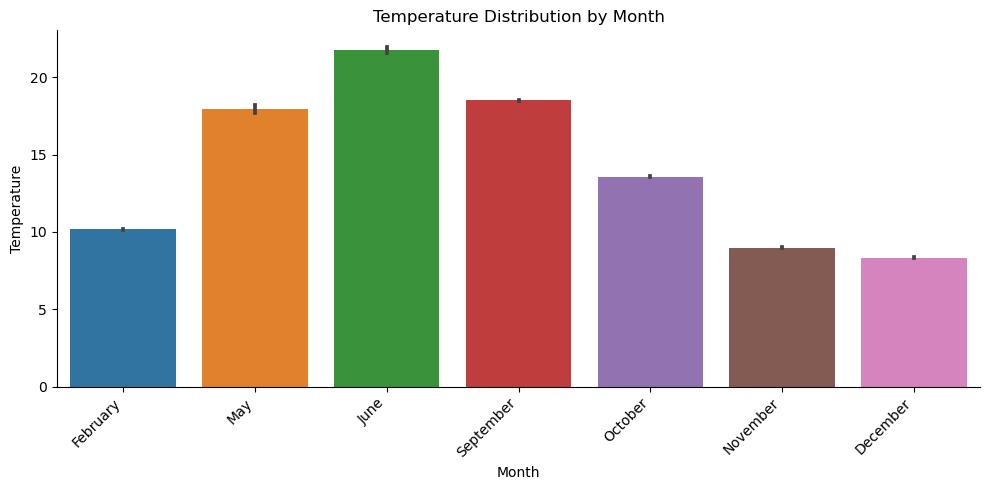

In [61]:
somi_data['EnqueuedTimeUtc'] = pd.to_datetime(somi_data['EnqueuedTimeUtc'], format='%d/%m/%Y %H:%M:%S')

#Extracting the month and year from 'EnqueuedTimeUtc' column
somi_data['Month'] = somi_data['EnqueuedTimeUtc'].dt.month_name()

plt.figure(figsize=(10,8))
#Creating a pair plot of bar charts with each month
sns.catplot(data=somi_data, x='Month', y='temparature', kind='bar', height=5, aspect=2)
plt.title('Temperature Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

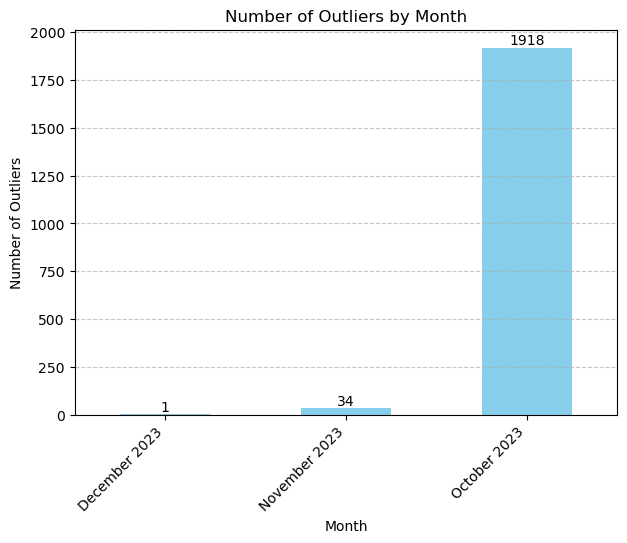

In [62]:
#Converting the 'EnqueuedTimeUtc' column to datetime format
somi_data['EnqueuedTimeUtc'] = pd.to_datetime(somi_data['EnqueuedTimeUtc'], format='%d/%m/%Y %H:%M:%S')

#Filtering outliers (temperature lower than -5)
outliers = somi_data[somi_data['temparature'] < -5]

#Assign the month values using .loc
outliers.loc[:, 'Month'] = outliers['EnqueuedTimeUtc'].dt.strftime('%B %Y')

#Count the number of outliers for each month
outliers_by_month = outliers['Month'].value_counts().sort_index()

#Create a bar plot for the outliers by month
plt.figure(figsize=(7, 5))
outliers_by_month.plot(kind='bar', color='skyblue')
plt.title('Number of Outliers by Month')
plt.xlabel('Month')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(outliers_by_month):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', color='black')
plt.show()

C:\Users\ogeum\AppData\Local\Temp\ipykernel_5404\388656848.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers['Hour'] = non_outliers['EnqueuedTimeUtc'].dt.hour


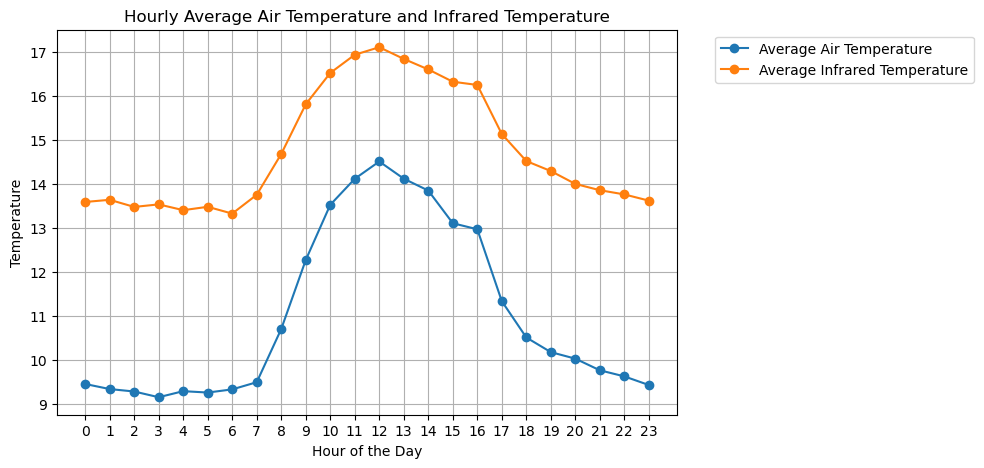

In [63]:
#Filter out outliers based on temperature lower than -5
non_outliers = somi_data[somi_data['temparature'] >= -5]

#Extract the hour from the 'EnqueuedTimeUtc' column
non_outliers['Hour'] = non_outliers['EnqueuedTimeUtc'].dt.hour

#Group by hour and calculate the average temperature and infrared temperature
hourly_avg_temperature = non_outliers.groupby('Hour')['temparature'].mean()
hourly_avg_infrared_temperature = non_outliers.groupby('Hour')['irTemparature'].mean()

#Create a line plot for the hourly average temperature and infrared temperature
plt.figure(figsize=(8, 5))
plt.plot(hourly_avg_temperature, label='Average Air Temperature', marker='o')
plt.plot(hourly_avg_infrared_temperature, label='Average Infrared Temperature', marker='o')
plt.title('Hourly Average Air Temperature and Infrared Temperature')
plt.xlabel('Hour of the Day')
plt.ylabel('Temperature')
plt.xticks(range(24))
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

C:\Users\ogeum\AppData\Local\Temp\ipykernel_5404\1235416804.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Hour'] = outliers['EnqueuedTimeUtc'].dt.hour


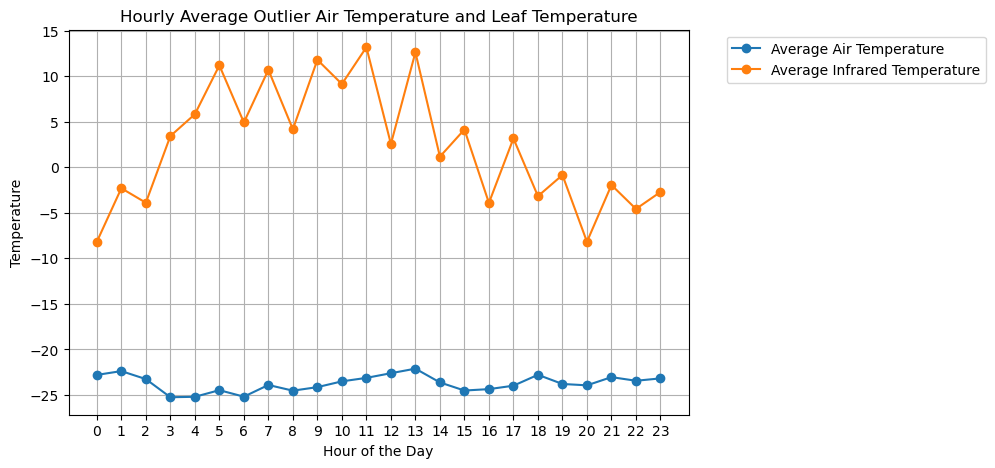

In [67]:
#Filter out outliers based on temperature lower than -5
outliers = somi_data[somi_data['temparature'] < -5]

#Extract the hour from the 'EnqueuedTimeUtc' column
outliers['Hour'] = outliers['EnqueuedTimeUtc'].dt.hour

#Group by hour and calculate the average temperature and infrared temperature
hourly_avg_temperature = outliers.groupby('Hour')['temparature'].mean()
hourly_avg_infrared_temperature = outliers.groupby('Hour')['irTemparature'].mean()

#Create a line plot for the hourly average temperature and infrared temperature
plt.figure(figsize=(8, 5))
plt.plot(hourly_avg_temperature, label='Average Air Temperature', marker='o')
plt.plot(hourly_avg_infrared_temperature, label='Average Infrared Temperature', marker='o')
plt.title('Hourly Average Outlier Air Temperature and Leaf Temperature')
plt.xlabel('Hour of the Day')
plt.ylabel('Temperature')
plt.xticks(range(24))
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

C:\Users\ogeum\AppData\Local\Temp\ipykernel_5404\2634411688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Outlier'] = outliers['temparature'] < -5


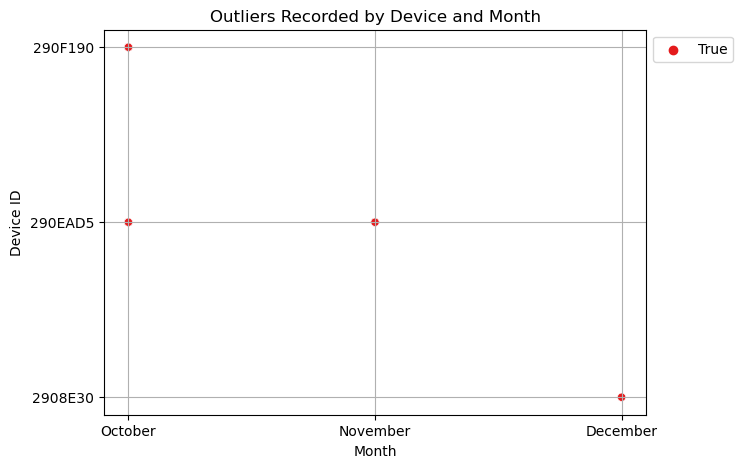

In [70]:
outliers['Outlier'] = outliers['temparature'] < -5

# Create a scatter plot
plt.figure(figsize=(7, 5))
sns.scatterplot(data=outliers, x='Month', y='deviceId', hue='Outlier', palette='Set1', marker='o')

# Set plot labels and title
plt.title('Outliers Recorded by Device and Month')
plt.xlabel('Month')
plt.ylabel('Device ID')

# Move the legend to the top right corner outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.show()

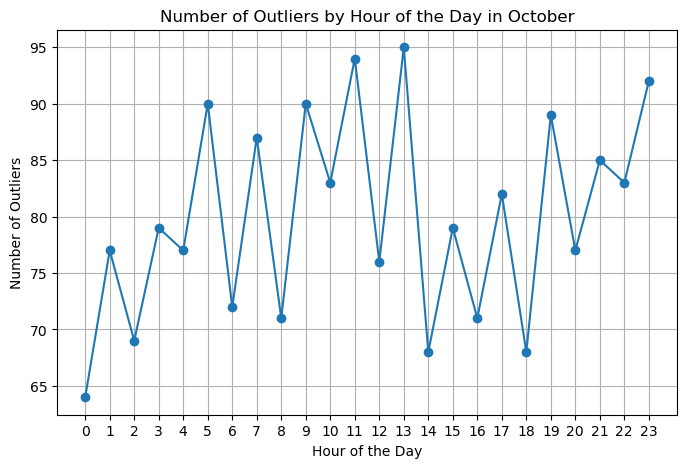

In [71]:
#Filter the dataset for outliers based on temperature lower than -5 for the month of October
october_outliers = somi_data[(somi_data['temparature'] < -5) & (somi_data['EnqueuedTimeUtc'].dt.month == 10)].copy()

#Extract the hour of the day from the 'EnqueuedTimeUtc' column
october_outliers.loc[:, 'Hour'] = october_outliers['EnqueuedTimeUtc'].dt.hour

#Group by hour and count the number of outliers for each hour of the day
hourly_outliers_count_october = october_outliers.groupby('Hour').size()

#Create a line plot for the number of outliers against the hour of the day for October
plt.figure(figsize=(8, 5))
plt.plot(hourly_outliers_count_october, marker='o')
plt.title('Number of Outliers by Hour of the Day in October')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Outliers')
plt.xticks(range(24)) 
plt.grid(True)
plt.show()

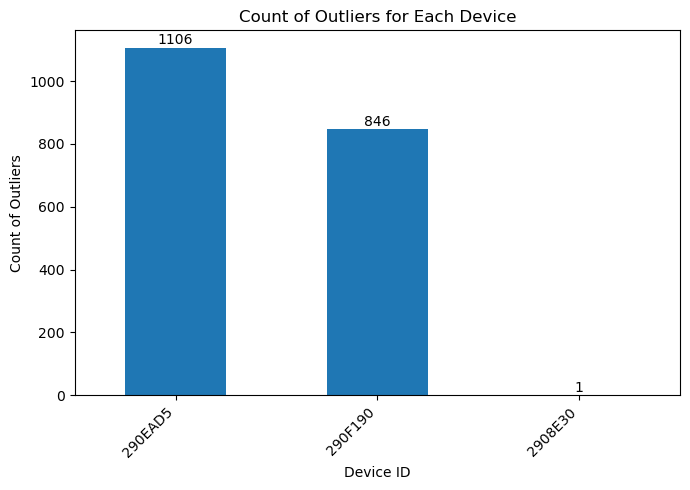

In [72]:
#Filter the dataset for outliers based on temperature lower than -5
outliers = somi_data[somi_data['temparature'] < -5]

#Count the number of outliers for each device
outlier_counts = outliers['deviceId'].value_counts()

#Plot the count of outliers for each device
plt.figure(figsize=(7, 5))
outlier_counts.plot(kind='bar')
plt.xlabel('Device ID')
plt.ylabel('Count of Outliers')
plt.title('Count of Outliers for Each Device')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for i, v in enumerate(outlier_counts):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', color='black')
plt.show()

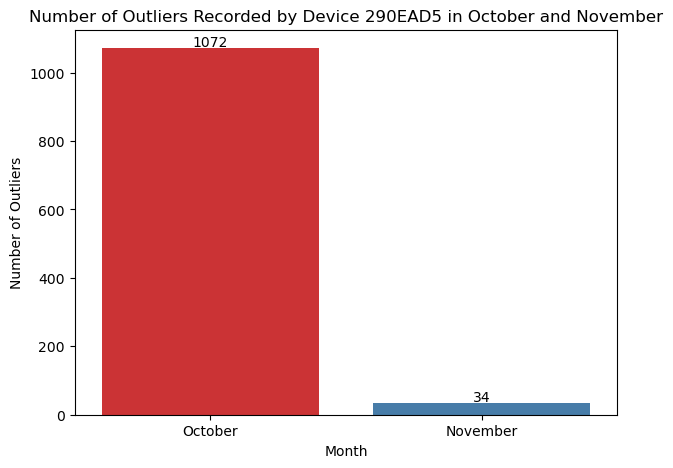

Number of outliers recorded by Device 290EAD5 in October: 1072
Number of outliers recorded by Device 290EAD5 in November: 34


In [73]:
#Filter the dataset for the device with ID '290EAD5' and for the months of October and November
device_outliers = outliers[(outliers['deviceId'] == '290EAD5') & (outliers['Month'].isin(['October', 'November']))]

#Filter the temperature values less than -5
device_outliers = device_outliers[device_outliers['temparature'] < -5]

#Count the number of outliers recorded in October and November
october_count = device_outliers[device_outliers['Month'] == 'October'].shape[0]
november_count = device_outliers[device_outliers['Month'] == 'November'].shape[0]

#Create a bar plot
plt.figure(figsize=(7, 5))
sns.barplot(x=['October', 'November'], y=[october_count, november_count], palette='Set1')
plt.title('Number of Outliers Recorded by Device 290EAD5 in October and November')
plt.xlabel('Month')
plt.ylabel('Number of Outliers')

#Adding annotations to the top of each bar
for i, count in enumerate([october_count, november_count]):
    plt.text(i, count + 5, str(count), ha='center')

plt.show()

#Print the counts of outliers recorded in October and November
print("Number of outliers recorded by Device 290EAD5 in October:", october_count)
print("Number of outliers recorded by Device 290EAD5 in November:", november_count)

In [74]:
#Filter the dataset for temperatures above 30 degrees
high_temperatures = somi_data[somi_data['temparature'] > 30]

#Check if there are any records with temperatures above 30 degrees
if not high_temperatures.empty:
    print("Temperature rose above 30 degrees at some point.")
    print(high_temperatures)
else:
    print("Temperature did not rise above 30 degrees.")

Temperature rose above 30 degrees at some point.
          EnqueuedTimeUtc deviceId  humidity  temparature  irTemparature  \
69564 2023-10-07 12:54:51  2908FDA        45           31             22   

       Hour    Month  
69564    12  October  


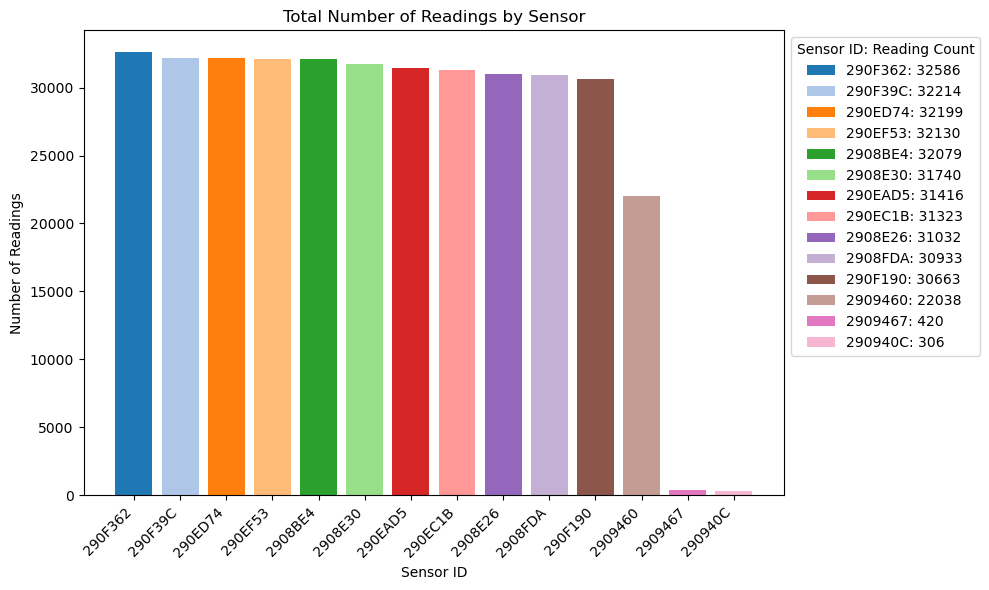

In [75]:
#Group the data by sensor ID and count the number of readings
sensor_readings_count = somi_data['deviceId'].value_counts().reset_index()
sensor_readings_count.columns = ['deviceId', 'Reading Count']

#Assign colors for each sensor
colors = plt.cm.tab20.colors
colors *= (len(sensor_readings_count) // len(colors)) + 1

#Plot the total number of readings for each sensor
plt.figure(figsize=(10, 6))
bars = plt.bar(sensor_readings_count['deviceId'], sensor_readings_count['Reading Count'], color=colors)
plt.title('Total Number of Readings by Sensor')
plt.xlabel('Sensor ID')
plt.ylabel('Number of Readings')
plt.xticks(rotation=45, ha='right')

#Create a legend outside the plot
legend_labels = [f"{device_id}: {reading_count}" for device_id, reading_count in zip(sensor_readings_count['deviceId'], sensor_readings_count['Reading Count'])]
plt.legend(bars, legend_labels, title='Sensor ID: Reading Count', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

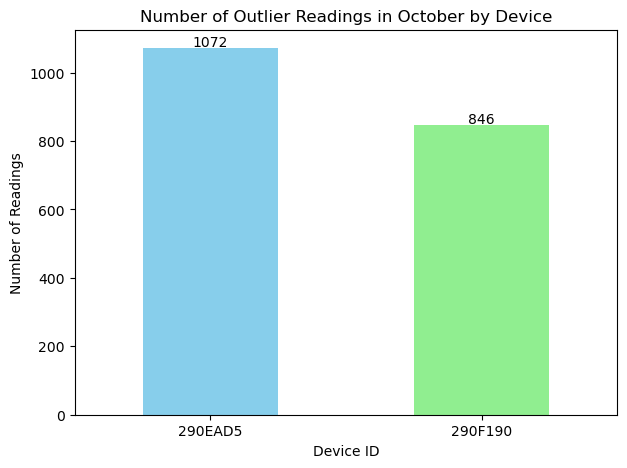

In [76]:
#Filter the dataset for outliers recorded by devices 290EAD5 and 290F190 for the month of October
device_outliers_october = outliers[(outliers['deviceId'].isin(['290EAD5', '290F190'])) & (outliers['Month'] == 'October')]

#Filter the outlier values less than -5
device_outliers_october = device_outliers_october[device_outliers_october['temparature'] < -5]

device_counts = device_outliers_october['deviceId'].value_counts()

#Plot the bar plot
plt.figure(figsize=(7, 5))
device_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Number of Outlier Readings in October by Device')
plt.xlabel('Device ID')
plt.ylabel('Number of Readings')
plt.xticks(rotation=0)  # Rotate x-axis labels

#Add annotations to the top of each bar
for i, count in enumerate(device_counts):
    plt.text(i, count + 5, str(count), ha='center')

plt.show()

In [77]:
#Filter the dataset for outliers based on temperature lower than -5 and for the month of October
october_outliers = somi_data[(somi_data['temparature'] < -5) & (somi_data['EnqueuedTimeUtc'].dt.month == 10)].copy()  # Make a copy to avoid SettingWithCopyWarning

#Extract the hour of the day from the 'EnqueuedTimeUtc' column
october_outliers['Hour'] = october_outliers['EnqueuedTimeUtc'].dt.hour

#Group by hour of the day and count the number of outliers for each hour
hourly_outliers_count_october = october_outliers.groupby('Hour').size()

#Find the hour with the maximum number of outliers
max_outlier_hour_october = hourly_outliers_count_october.idxmax()

print("Hour in October when the most outliers occur:", max_outlier_hour_october)

Hour in October when the most outliers occur: 13


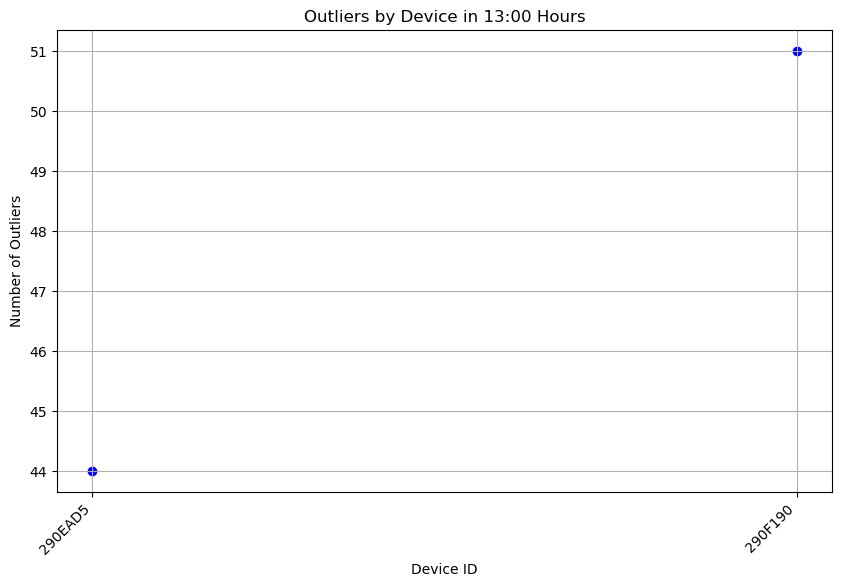

In [78]:
#Filter the data for outliers occurring at 13:00
outliers_at_13 = october_outliers[october_outliers['Hour'] == 13]

#Group by device ID and count the number of outliers for each device at 13:00
device_outliers_count_13 = outliers_at_13.groupby('deviceId').size().reset_index(name='OutlierCount')

#Plot a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(device_outliers_count_13['deviceId'], device_outliers_count_13['OutlierCount'], color='blue')
plt.title('Outliers by Device in 13:00 Hours')
plt.xlabel('Device ID')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()